In [2]:
#I wanted to see if every single player on the Venezuelan's men soccer team touched the ball during
#the creation of the third goal against Chile. Not only that, but also wanted to see on which side of the   
#field they played the most. 

#I made use of ChatGPT for some areas of the coding process as I was not familiar with some of the 
#technical aspects, but later I edited things to make it work as I wanted


In [1]:
import pandas as pd

# I manually extracted the x,y locations of the actions using FC Python interface: https://fcpythonvideocoder.netlify.app/

file_path = 'C:/Users/verde/Desktop/data/Goal3.txt'
df = pd.read_csv(file_path, delimiter = "\t")
df.head()

#X,Y: Values of the initial Contact
#X2,Y2: Final Position of the ball for that particular contact

,Team,Player,Event,Mins,Secs,X,Y,X2,Y2
0,Chile,Alexánder Aravená,Missed Pass,17.0,41.0,77.0,95.0,66.0,82.0
1,Venezuela,Darwin Machís,Pass,17.0,54.0,65.0,80.0,69.0,94.0
2,Venezuela,González,Pass,18.0,28.0,69.0,94.0,65.0,80.0
3,Venezuela,Darwin Machís,Dribble,18.0,42.0,64.0,79.0,64.0,71.0
4,Venezuela,Darwin Machís,Pass,18.0,52.0,65.0,72.0,60.0,63.0


In [2]:
# Unfortunately, the X,Y,X1,Y2 range of FC Python is different to the one of Pitch on mpl, so I had to adjust the XY variables.

df['Y']=df['Y'].astype(float)*(65/100)
df['Y2']=df['Y2'].astype(float)*(65/100)

df['X']=df['X'].astype(float)*(120/100)
df['X2']=df['X2'].astype(float)*(120/100)

df['dx'] = df['X2'].astype(float)- df['X'].astype(float)
df['dy'] = df['Y2'].astype(float) - df['Y'].astype(float)

In [3]:
#I did not need the values of Chile's touches with the ball
Vzla10=df[df['Team']=='Venezuela']

Text(0.5, 1.0, '\nHeat Map \n Venezuelas 70+ pass sequence vs Chile\n')

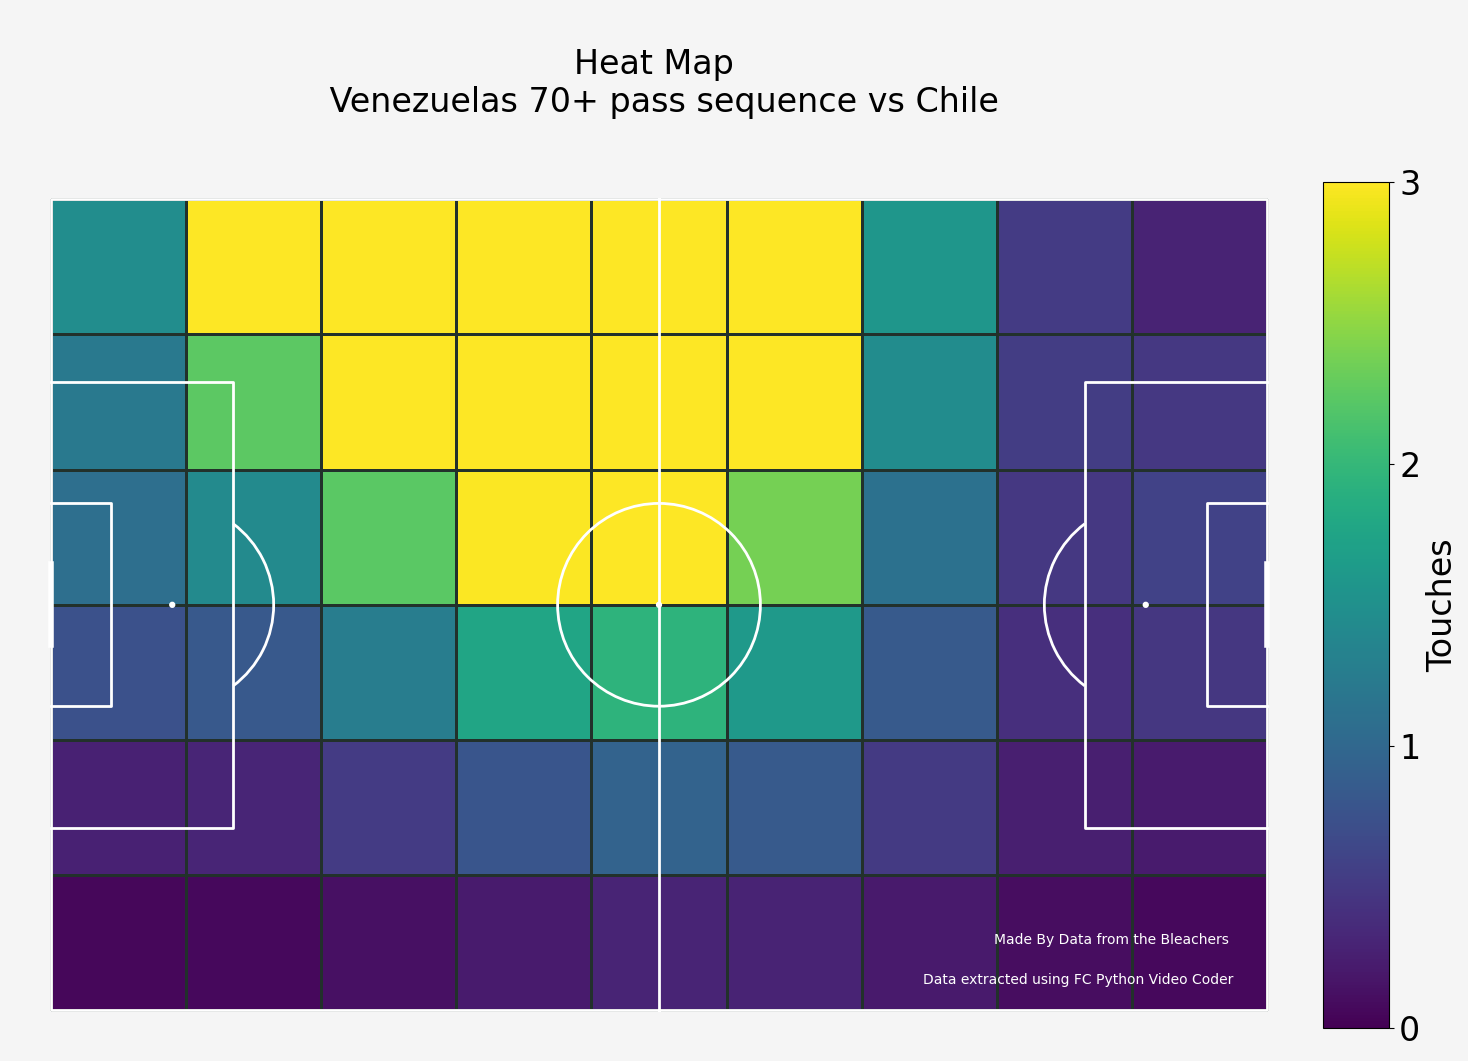

In [4]:
import matplotlib.pyplot as plt #For plotting the movements
from scipy.ndimage import gaussian_filter #I added this to get a Heatmap style of graph
from mplsoccer.pitch import Pitch #I needed a soccer pitch

pitch = pitch = Pitch(line_zorder=2,line_color='white') #zorder equals 2 so the field lines show and color white for classic.
fig, ax = pitch.draw(figsize=(13.28, 16.28*2)) #Just customized the size

fig.set_facecolor('whitesmoke') #Background color
ax.patch.set_facecolor('whitesmoke') #Background color

bin_statistic = pitch.bin_statistic(Vzla10.X, Vzla10.Y, statistic='count', bins=(9,6)) #this is to slice the field in blocks. 9 by 6 seems the smallest division that makes sense to me.
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap_positional([bin_statistic], ax=ax, cmap='viridis', edgecolors='#22312b')
pcm[0].set_clim(0,3)  #this is to define the range of touches per bin for coloring. 2 per bin

# Calculate the total number of shots
total_shots = bin_statistic['statistic'].sum()

# Calculate the percentage for each bin
percentage = (bin_statistic['statistic'] / total_shots) * 100

########## Random Text #############
plt.text(93, 73, 'Made By Data from the Bleachers', fontsize=10, color='white', ha='left', va='center')
plt.text(86, 77, 'Data extracted using FC Python Video Coder', fontsize=10, color='white', ha='left', va='center')

# Create a new axes for the colorbar at the desired position and size
cbar_ax = fig.add_axes([1, 0.37, 0.05, 0.26])  # For my own reference as I was adjusting [left, bottom, width, height]

# Add the colorbar to the new axes
cbar = fig.colorbar(pcm[0], cax=cbar_ax) #Set range of color bar
cbar.set_ticks([0,1,2,3])
cbar.ax.tick_params(labelsize=24) #Set tick label size on the colorbar
cbar.set_label("Touches", fontsize=24) #Adjust colorbar labelsize

ax.set_title('\nHeat Map \n Venezuelas 70+ pass sequence vs Chile\n', fontsize=24) #Title

#This shows that venezuela pushed more using their left side, which makes sense since
#most of the attacks were coming from using Soteldo -their most agile player- and also 
#that side is where Chile lost 1 player.
#But this single image does not show the whole buildup process - I want to see the overall
# creation of the goal... so I wanted to create a video.

In [5]:
#Here I made use of ChatGPT since I was not familiar with the video process.
#Keep in mind that this is very computer intensive and may not be the best approach

import os #To remove all images that are created during the video creating process
import imageio # To create the video

# Create a list to store the filepaths of the images
filenames = []

#This For Cycle creates a single heat image per event. 
for i in range(len(Vzla10)):
    fig, ax = pitch.draw(figsize=(18, 10))
    fig.set_facecolor('whitesmoke')
    ax.patch.set_facecolor('whitesmoke')
    bin_statistic = pitch.bin_statistic(Vzla10.X.iloc[0:i], Vzla10.Y.iloc[0:i], statistic='count', bins=(9,6))
    bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
    pcm = pitch.heatmap_positional([bin_statistic], ax=ax, cmap='viridis', edgecolors='#22312b')
    pcm[0].set_clim(0, 3)

#logic above is pretty must the same as in the picture. 
    
    # Calculate the total number of shots
    total_shots = bin_statistic['statistic'].sum()

    # Calculate the percentage for each bin
    if total_shots != 0:
        percentage = (bin_statistic['statistic'] / total_shots) * 100
    else:
        percentage = 0

#for some reason the code was giving me an error - apparently there was some division over zero, so
# I had to add a condition to switch percentage to 0.
    
    plt.text(60,85,'Venezuelas 70+ pass sequence vs Chile \n Oct 17 2023',fontdict={"fontsize": 24},color='black', horizontalalignment="center", verticalalignment="center")
    plt.text(92, 73, 'Made By Data from the Bleachers', fontsize=10, color='white', ha='left', va='center')
    plt.text(84, 77, 'Data extracted using FC Python Video Coder', fontsize=10, color='white', ha='left', va='center')

    ax.set_ylim(0,100)
    ax.invert_yaxis() #I had to invert the axis because for some reason
    
    # Create a new axes for the colorbar at the desired position and size
    cbar_ax = fig.add_axes([0.1, 0.2, 0.04, 0.78])  # [left, bottom, width, height]

    # Add the colorbar to the new axes
    cbar = fig.colorbar(pcm[0], cax=cbar_ax) #Set range of color bar
    cbar.set_ticks([0,1,2,3])
    cbar.ax.tick_params(labelsize=24) #Set tick label size on the colorbar
    cbar.set_label("Touches", fontsize=24, rotation=90, labelpad=-100) #Adjust colorbar labelsize
        
    # Save the figure to a png file
    filename = f'frame_{i}.png'
    plt.savefig(filename)
    filenames.append(filename)

    plt.close()
    
# Create a video from the images
with imageio.get_writer('First Movie.mp4', mode='I', fps=2,macro_block_size=1) as writer:  # Decrease fps for a longer video
    for filename in filenames:
        image = imageio.v2.imread(filename)
        writer.append_data(image)

# Remove the image files
for filename in filenames:
    os.remove(filename)

#This is nice, but I want to see arrows between each action.

In [6]:
#Same code as a above - I removed the comments and ONLY added comments in the new parts.
filenames = []

for i in range(len(Vzla10)):
    fig, ax = pitch.draw(figsize=(18, 10))
    fig.set_facecolor('whitesmoke')
    ax.patch.set_facecolor('whitesmoke')
    bin_statistic = pitch.bin_statistic(Vzla10.X.iloc[0:i], Vzla10.Y.iloc[0:i], statistic='count', bins=(9,6))
    bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
    pcm = pitch.heatmap_positional([bin_statistic], ax=ax, cmap='viridis', edgecolors='#22312b')
    pcm[0].set_clim(0, 3)

    total_shots = bin_statistic['statistic'].sum()

    if total_shots != 0:
        percentage = (bin_statistic['statistic'] / total_shots) * 100
    else:
        percentage = 0
    
    plt.text(60,85,'Venezuelas 70+ pass sequence vs Chile \n Oct 17 2023',fontdict={"fontsize": 24},color='black', horizontalalignment="center", verticalalignment="center")
    plt.text(92, 73, 'Made By Data from the Bleachers', fontsize=10, color='white', ha='left', va='center')
    plt.text(84, 77, 'Data extracted using FC Python Video Coder', fontsize=10, color='white', ha='left', va='center')

    ax.set_ylim(0,100)
    ax.invert_yaxis() 
    
    # I used Quiver to add arrows that connect between actions
    start = max(0, i-4)  # This is to avoid overflow of arrows in the chart
                         # the arrows that are getting created and continously dissapear
                         # after 4 are created.
    ax.quiver(df['X'].iloc[start:i+1], df['Y'].iloc[start:i+1], df['dx'].iloc[start:i+1], df['dy'].iloc[start:i+1], angles='xy', scale_units='xy', scale=1,color='whitesmoke',headlength=2,headaxislength=1)
    
    cbar_ax = fig.add_axes([0.1, 0.2, 0.04, 0.78])  

    cbar = fig.colorbar(pcm[0], cax=cbar_ax) 
    cbar.set_ticks([0,1,2,3])
    cbar.ax.tick_params(labelsize=24) 
    cbar.set_label("Touches", fontsize=24, rotation=90, labelpad=-100) 
        
    filename = f'frame_{i}.png'
    plt.savefig(filename)
    filenames.append(filename)

    plt.close()
    
with imageio.get_writer('Second Movie.mp4', mode='I', fps=2,macro_block_size=1) as writer:  # Decrease fps for a longer video
    for filename in filenames:
        image = imageio.v2.imread(filename)
        writer.append_data(image)

for filename in filenames:
    os.remove(filename)

#This is pretty great. But now I want to show the players that touched the ball and how many times they did...

In [7]:
#Same code as a above - I removed the comments and ONLY added comments in the new parts.
filenames = []
player_event_count = {} #Dictionary to attach the count to each individual player 

for i in range(len(Vzla10)):
    fig, ax = pitch.draw(figsize=(18, 10))
    fig.set_facecolor('whitesmoke')
    ax.patch.set_facecolor('whitesmoke')
    bin_statistic = pitch.bin_statistic(Vzla10.X.iloc[0:i], Vzla10.Y.iloc[0:i], statistic='count', bins=(9,6))
    bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
    pcm = pitch.heatmap_positional([bin_statistic], ax=ax, cmap='viridis', edgecolors='#22312b')
    pcm[0].set_clim(0, 3)

    total_shots = bin_statistic['statistic'].sum()

    if total_shots != 0:
        percentage = (bin_statistic['statistic'] / total_shots) * 100
    else:
        percentage = 0
    
    plt.text(60,85,'Venezuelas 70+ pass sequence vs Chile \n Oct 17 2023',fontdict={"fontsize": 24},color='black', horizontalalignment="center", verticalalignment="center")
    plt.text(92, 73, 'Made By Data from the Bleachers', fontsize=10, color='white', ha='left', va='center')
    plt.text(84, 77, 'Data extracted using FC Python Video Coder', fontsize=10, color='white', ha='left', va='center')

    ax.set_ylim(0,100)
    ax.invert_yaxis() 
    
    start = max(0, i-4)
    ax.quiver(df['X'].iloc[start:i+1], df['Y'].iloc[start:i+1], df['dx'].iloc[start:i+1], df['dy'].iloc[start:i+1], angles='xy', scale_units='xy', scale=1,color='whitesmoke',headlength=2,headaxislength=1)
 
     #Create  Update the player_event_count dictionary
    player = Vzla10['Player'].iloc[i] #Tracking player per event
    event = Vzla10['Event'].iloc[i] #tracking event per event
    
    if event != 'None': #Condition to count the number of touches per player
        if player not in player_event_count:
            player_event_count[player] = 0
        player_event_count[player] += 1

    # Display the count on the video frame
    y_position = 40  # This is to locate the player count - Adjust y_position as needed 
    
    for player, count in player_event_count.items(): #This updates the player count every cycle
        plt.text(122, y_position, f'{player}: {count}', fontsize=20, color='black')
        y_position -= -4 #This is to continously dropping the position of each new player on the list
                         #so it actually shows as a list

    cbar_ax = fig.add_axes([0.1, 0.2, 0.04, 0.78])  
    cbar = fig.colorbar(pcm[0], cax=cbar_ax) 
    cbar.set_ticks([0,1,2,3])
    cbar.ax.tick_params(labelsize=24) 
    cbar.set_label("Touches", fontsize=24, rotation=90, labelpad=-100) 
        
    filename = f'frame_{i}.png'
    plt.savefig(filename)
    filenames.append(filename)

    plt.close()
    
with imageio.get_writer('Third Movie.mp4', mode='I', fps=2,macro_block_size=1) as writer:  # Decrease fps for a longer video
    for filename in filenames:
        image = imageio.v2.imread(filename)
        writer.append_data(image)

for filename in filenames:
    os.remove(filename)
